In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate


# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("Resources/heart_2022_cleaned.csv")
# Display sample data
df

,Sex,Age,Race,BMI,Height,Weight,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,1,12,0,26.57,1.60,68.04,4,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,7,0,25.61,1.57,63.50,3,2.0,3.0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,4,0,21.77,1.57,53.98,1,2.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,12,0,26.08,1.80,84.82,0,1.0,0.0,0,...,0,0,1,0,1,0,0,0,0,1
4,1,12,1,22.96,1.65,62.60,3,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,0,9,3,29.86,1.68,83.91,2,0.0,15.0,1,...,0,1,0,0,1,0,0,0,0,1
318930,0,2,0,31.19,1.83,104.33,2,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
318931,1,6,1,28.66,1.70,83.01,4,2.0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
318932,0,10,1,32.55,1.83,108.86,3,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0


# 5. Machine Learning

### 5.3. Deep Learning - Standard Scaler Module (Neural Network)

#### 5.3.1. Loading and Preprocessing the Dataset

In [3]:
# Copy dataset for Machine Learning
df2 = df.copy()

In [4]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df2.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 3748
Height               103
Weight               538
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            23
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [5]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df2["BMI"].value_counts()
bmi_counts

BMI
26.63    3438
27.46    2642
24.41    2601
27.44    2495
27.12    2468
         ... 
60.15       1
59.13       1
20.17       1
47.28       1
28.39       1
Name: count, Length: 3748, dtype: int64

In [6]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 150].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df2['BMI'] = df2['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df2['BMI'].value_counts()

BMI
Other    72175
26.63     3438
27.46     2642
24.41     2601
27.44     2495
         ...  
25.29      152
26.94      151
26.46      150
20.48      150
26.17      150
Name: count, Length: 451, dtype: int64

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df4 = pd.get_dummies(df2)
num_df4.head()

,Sex,Age,Race,Height,Weight,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,...,BMI_42.07,BMI_42.51,BMI_42.57,BMI_42.91,BMI_43.05,BMI_43.27,BMI_44.29,BMI_44.3,BMI_44.63,BMI_Other
0,1,12,0,1.60,68.04,4,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,7,0,1.57,63.50,3,2.0,3.0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,4,0,1.57,53.98,1,2.0,0.0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,0,12,0,1.80,84.82,0,1.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1,12,1,1.65,62.60,3,0.0,0.0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Split data into features (X) and target variable (y)
X = num_df4.drop("HeartAttack", axis=1).values
y = num_df4["HeartAttack"].values

In [9]:

# **** UNDER SAMPLING ********
# Random UnderSampler for balancing the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# *** X_resampled and y_resampled are now new balanced datasets

In [10]:
# Split the data using train_test_split # stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify = y_resampled,  # to maintain the same proportion of classes in both train and test sets. 
    random_state = 78
)

In [11]:
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    stratify=y_train, 
    random_state=78, 
    test_size=0.2
)


#### 5.3.2. Fitting the Model

In [12]:
# Preprocess numerical data for Neural Network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### 5.3.3. Compile, Train and Evaluate the Model

In [13]:
import tensorflow as tf

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        37,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,961 (199.07 KB)

 Trainable params: 50,961 (199.07 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
#fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Train the model with validation data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val))

Epoch 1/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7230 - loss: 0.5370 - val_accuracy: 0.7923 - val_loss: 0.4444
Epoch 2/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7991 - loss: 0.4250 - val_accuracy: 0.8009 - val_loss: 0.4340
Epoch 3/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.8037 - loss: 0.4109 - val_accuracy: 0.7970 - val_loss: 0.4363
Epoch 4/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8143 - loss: 0.3972 - val_accuracy: 0.7998 - val_loss: 0.4388
Epoch 5/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8148 - loss: 0.3897 - val_accuracy: 0.7968 - val_loss: 0.4417
Epoch 6/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8191 - loss: 0.3878 - val_accuracy: 0.7917 - val_loss: 0.4473
Epoch 7/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8212 - loss: 0.3819 - val_accuracy: 0.7960 - val_loss: 0.4469
Epoch 8/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8360 - loss: 0.3529 

In [26]:
# Evaluate the model using the test data
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")

265/265 - 0s - 589us/step - accuracy: 0.7474 - loss: 2.2551
Loss: 2.2551467418670654, Accuracy: 0.7474330067634583


In [17]:
# Compute the TensorFlow Confusion Matrix

# Predict on the test set
y_pred = nn_model.predict(X_test_scaled)
# print(f"Predictions: {y_pred[:5]}")  # Print first 5 predictions for inspection

# Convert predictions to binary classes
y_pred_classes = (y_pred > 0.5).astype(int).flatten() # a threshold of 0.5 to convert probabilities to binary class labels.

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

print('Confusion Matrix:')
print(confusion_matrix.numpy())

265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
Confusion Matrix:
[[3214 1022]
 [1118 3119]]


##### Calculate Accuracies, Losses, and Errors

In [18]:
# Calculate training and validation accuracy and loss from history. 
# [-1] for Accesses the element from the last epoch.
train_accuracy = fit_model.history['accuracy'][-1]
val_accuracy = fit_model.history['val_accuracy'][-1]
train_loss = fit_model.history['loss'][-1]
val_loss = fit_model.history['val_loss'][-1]


# Calculate training error, validation error, and test error
train_error = 1 - train_accuracy
val_error = 1 - val_accuracy
test_error = 1 - test_accuracy

# Print the results of Loss and Accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"------------------------------------")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"------------------------------------")
print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Training Accuracy: 0.9910
Validation Accuracy: 0.7425
Test Accuracy: 0.7474
------------------------------------
Training Loss: 0.0274
Validation Loss: 2.3291
Test Loss: 2.2551
------------------------------------
Training Error: 0.0090
Validation Error: 0.2575
Test Error: 0.2526


* If both the validation loss and test loss are greater than 1, it typically indicates that the model is not performing well in terms of predicting the target variable.

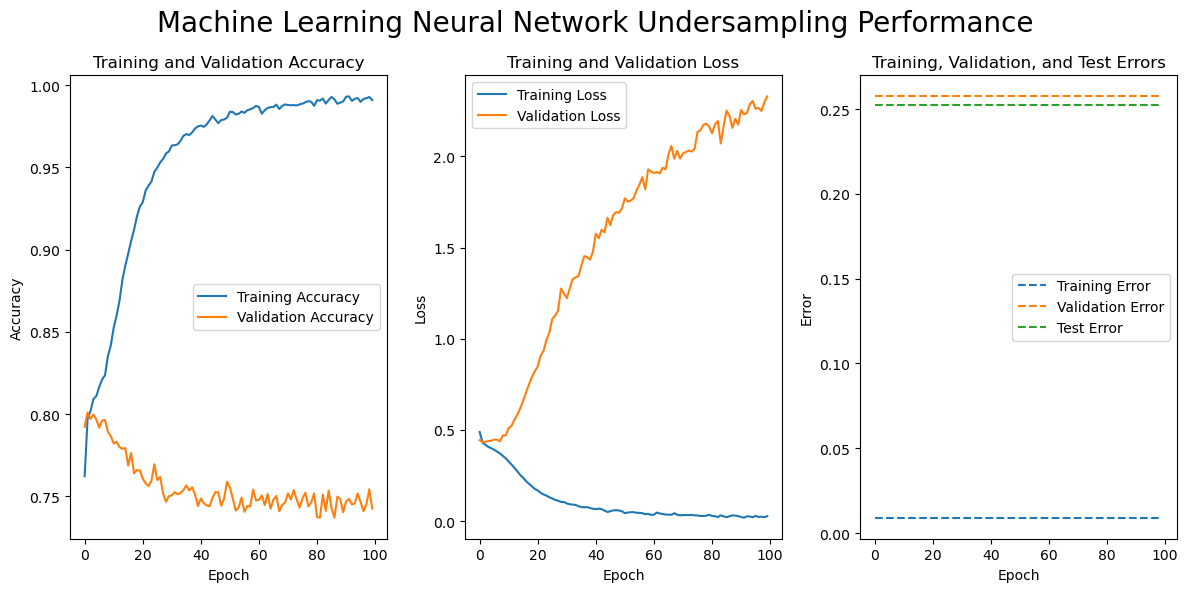

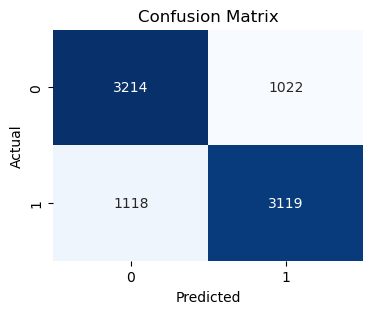

In [30]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 6))

plt.suptitle("Machine Learning Neural Network Undersampling Performance", fontsize=20)

# Accuracy
plt.subplot(1, 3, 1)
plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 3, 2)
plt.plot(fit_model.history['loss'], label='Training Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Errors
plt.subplot(1, 3, 3)
plt.plot([train_error] * len(fit_model.history['loss']), linestyle='--', label='Training Error')
plt.plot([val_error] * len(fit_model.history['loss']), linestyle='--', label='Validation Error')
plt.plot([test_error] * len(fit_model.history['loss']), linestyle='--', label='Test Error')
plt.title('Training, Validation, and Test Errors')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
plt.figure(figsize=(4, 3))
cm = tf.math.confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()